# Exercise 2: Sinusoids and the DFT

Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


## Part 1 - Generate a sinusoid

The function `gen_sine()` should generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 

Use the function `cos` of the numpy package to compute the sinusoidal values.

In [6]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

In [10]:
# E2 - 1.1: Complete function gen_sine()

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    if A < 0:
        raise ValueError("Amplitude must be non-negative")
    if fs < 0 or f > fs / 2:
        raise ValueError("Sampling frequency must be non-negative and less than or equal to Nyquist frequency (fs/2)")
    if f <= 0:
        raise ValueError("Frequency must be positive")
    if t <= 0:
        raise ValueError("Duration must be positive")
    
    T = np.arange(0, t, 1/fs) # array from 0 to t with step size 1/fs
    
    return A * np.cos(2 * np.pi * f * T + phi) # A * cos(2 * pi * f * t + phi)    

### Tests

If you use `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1` as input to the function `gen_sine()` the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use `A=1.0, f = 440.0, phi = 1.0, fs = 5000` and `t = 0.5`. To play it import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=x, rate=fs))`.

E2 - 1.2: correct


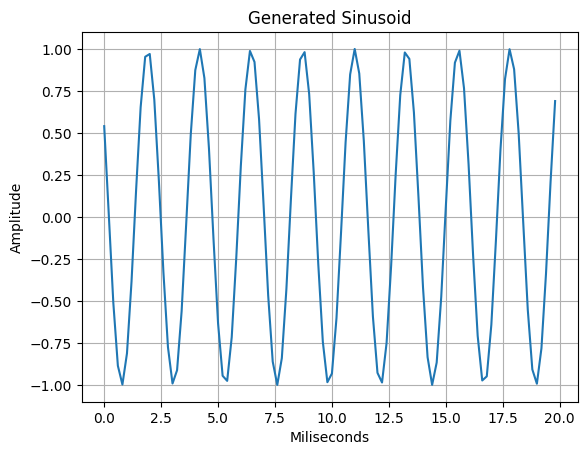

In [11]:
# E2 - 1.2: Call the function gen_sine() with the values proposed above, plot and play the output sinusoid
test = np.array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])

if np.allclose(gen_sine(1.0, 10.0, 1.0, 50, 0.1), test):
    print("E2 - 1.2: correct")
else:
    print("E2 - 1.2: incorrect")

fs = 5000

sinusoid = gen_sine(1.0, 440.0, 1.0, fs, 0.5)
plt.plot(np.array(np.arange(0, len(sinusoid[:100])) * 1000 / fs), sinusoid[:100])  # first 100 samples 
plt.title("Generated Sinusoid")
plt.xlabel("Miliseconds")
plt.ylabel("Amplitude")
plt.grid()
plt.show()
ipd.display(ipd.Audio(sinusoid, rate=fs))

## Part 2 - Generate a complex sinusoid 

The `gen_complex_sine()` function should generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function should return `c_sine`, a numpy array of the complex sinusoid. Use the function `exp()` of the numpy package to compute the complex sinusoidal values.

In [12]:
# E2 - 2.1: Complete the function gen_complex_sine()

def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    if k < 0 or k > N - 1:
        raise ValueError("Frequency index k must be non-negative and less than N")
    if N <= 0:
        raise ValueError("Length N must be positive")
    
    return np.exp(1j * 2 * np.pi * k * np.arange(N) / N) # e^(j*2*pi*k*n/N)


If you run the function `gen_complex_sine()` using `k=1` and `N=5`, it should return the following numpy array:

```
array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])
```

E2 - 2.2: correct


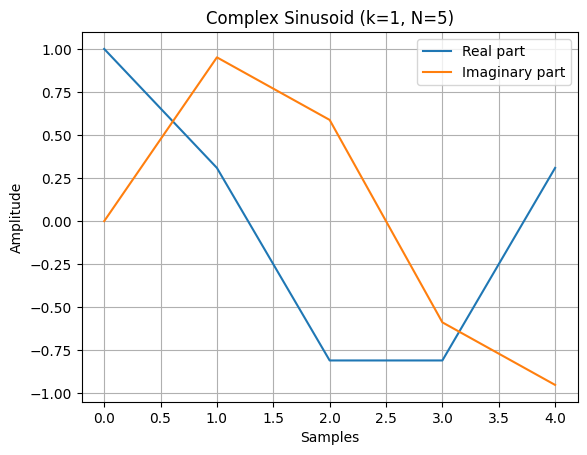

In [13]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

test = np.array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])
c_sine = gen_complex_sine(1, 5)

if np.allclose(c_sine, test):
    print("E2 - 2.2: correct")
else:
    print("E2 - 2.2: incorrect")

plt.plot(np.arange(len(c_sine)),np.real(c_sine), label='Real part')
plt.plot(np.arange(len(c_sine)),np.imag(c_sine), label='Imaginary part')
plt.title("Complex Sinusoid (k=1, N=5)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

## Part 3 - Implement the discrete Fourier transform (DFT)

The function `dft()` should implement the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X`, the DFT of `x`.

In [14]:
# E2 - 3.1: Complete the function dft()

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """

    N = len(x)
    if N <= 0:
        raise ValueError("Input sequence length must be positive")

    return [np.sum(x * gen_complex_sine(k, N).conj()) for k in range(N)] # sum(x[n] * e^(-j*2*pi*k*n/N)) for k=0 to N-1


If you run `dft()` using as input `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

E2 - 3.2: correct


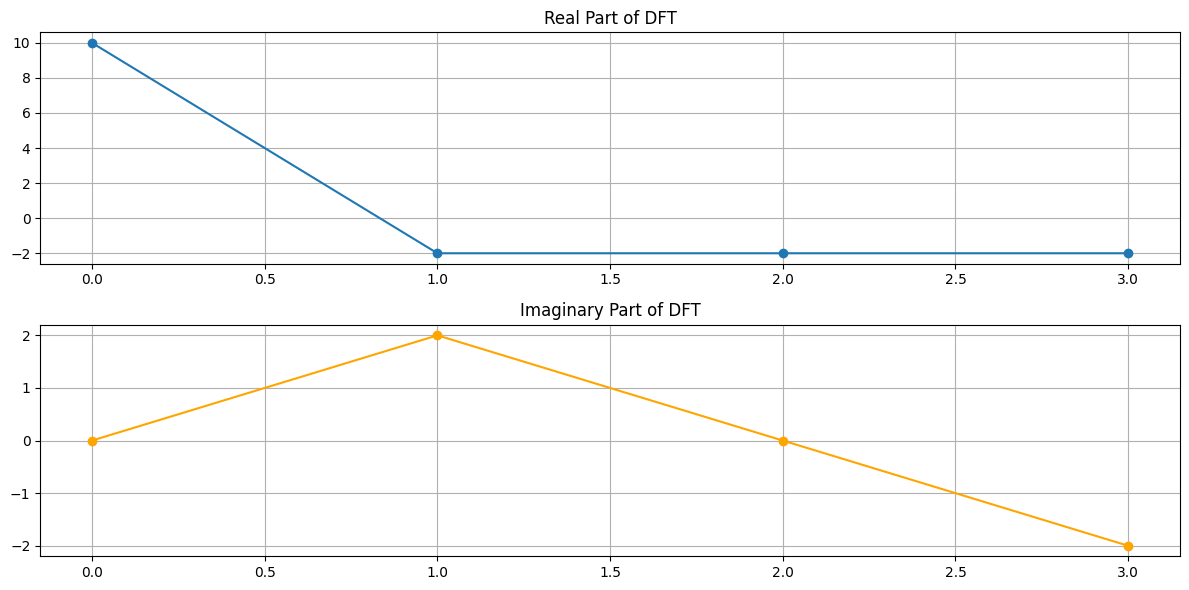

In [15]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum.

test = np.array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
spectrum = dft(np.array([1.0, 2.0, 3.0, 4.0]))

if np.allclose(spectrum, test):
    print("E2 - 3.2: correct")
else:
    print("E2 - 3.2: incorrect")

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.real(spectrum), marker='o')
plt.title("Real Part of DFT")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(np.imag(spectrum), marker='o', color='orange')
plt.title("Imaginary Part of DFT")
plt.grid()

plt.tight_layout()
plt.show()

## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

The function `idft()` should implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [16]:
# E2 - 4.1: Complete the function idft()

def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    N = len(X)
    if len(X) <= 0:
        raise ValueError("Input spectrum length must be positive")  

    return [1 / N * np.sum(X * gen_complex_sine(k, N)) for k in range(N)] # (1/N) * sum(X[k] * e^(j*2*pi*k*n/N)) for n=0 to N-1

If you run `idft()` with the input `X = np.array([1, 1, 1, 1])`, the function should return the following numpy array: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially `[1, 0, 0, 0]`. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

E2 - 4.2: correct


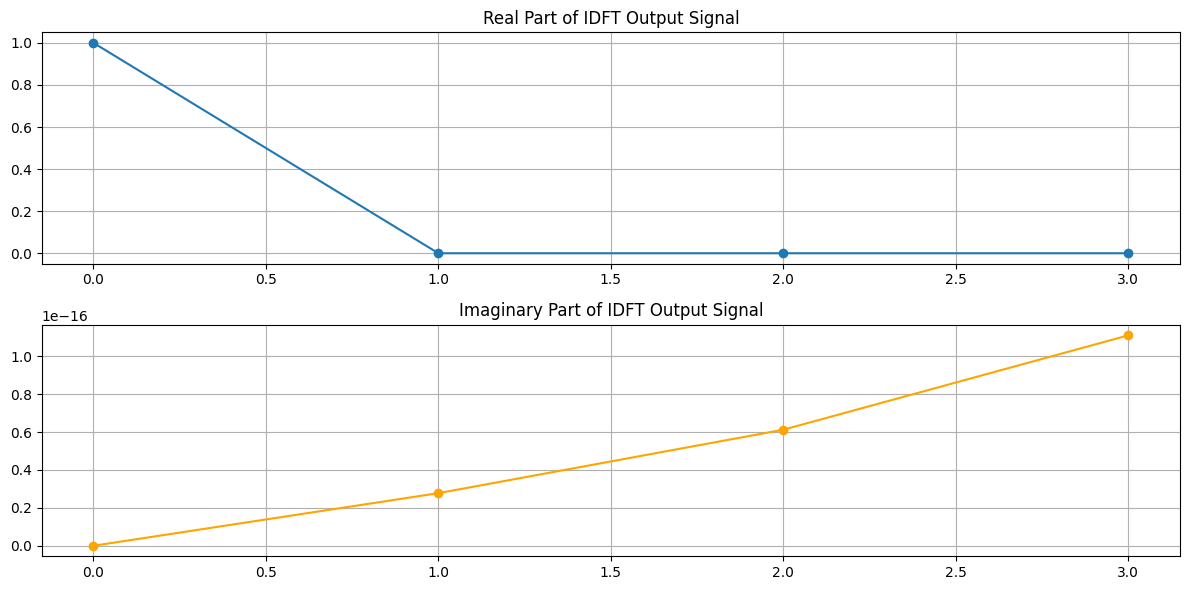

Recovered Spectrum: [(1+2.0001021803551222e-16j), (0.9999999999999999+7.75455381207769e-17j), (0.9999999999999999-7.754553812077694e-17j), (1.0000000000000002-2.0001021803551214e-16j)]
Original Spectrum:  [1 1 1 1]
Is the recovered spectrum close to the original?  True


In [17]:
# E2 - 4.2: Plot input spectrum (real and imaginary parts) suggested above, call idft(), plot output signal 
# (real and imaginary parts), compute the idft() of the output signal to validate that you get back the input spectrum.

test = np.array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
output_signal = idft(np.array([1, 1, 1, 1]))

if np.allclose(output_signal, test):
    print("E2 - 4.2: correct")
else:
    print("E2 - 4.2: incorrect")    

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.real(output_signal), marker='o')
plt.title("Real Part of IDFT Output Signal")
plt.grid()  

plt.subplot(2, 1, 2)
plt.plot(np.imag(output_signal), marker='o', color='orange')
plt.title("Imaginary Part of IDFT Output Signal")
plt.grid()
plt.tight_layout()
plt.show()  

# Validate by computing the DFT of the output signal to see if we get back the input spectrum
recovered_spectrum = dft(np.array(output_signal))
print("Recovered Spectrum:", recovered_spectrum)
print("Original Spectrum: ", np.array([1, 1, 1, 1]))
print("Is the recovered spectrum close to the original? ", np.allclose(recovered_spectrum, np.array([1, 1, 1, 1])))

## Part 5 - Compute the magnitude spectrum

The function `gen_mag_spectrum()` should compute the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [18]:
# E2 - 5.1: Complete the function gen_mag_spec()

def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
    return np.abs(dft(x)) # magnitude spectrum is the absolute value of the DFT


If you run `gen_mag_spec()` using as input `x = np.array([1, 2, 3, 4])`, it should return the following numpy array:
```
array([10.0, 2.82842712, 2.0, 2.82842712])
```
For a more realistic use of `gen_mag_spec()` use as input a longer signal, such as `x = np.cos(2*np.pi*200.0*np.arange(512)/1000)`, and to get a visual representation of the input and output, import the `matplotlib.pyplot` package and use `plt.plot(x)` and `plt.plot(X)`.

E2 - 5.2: correct


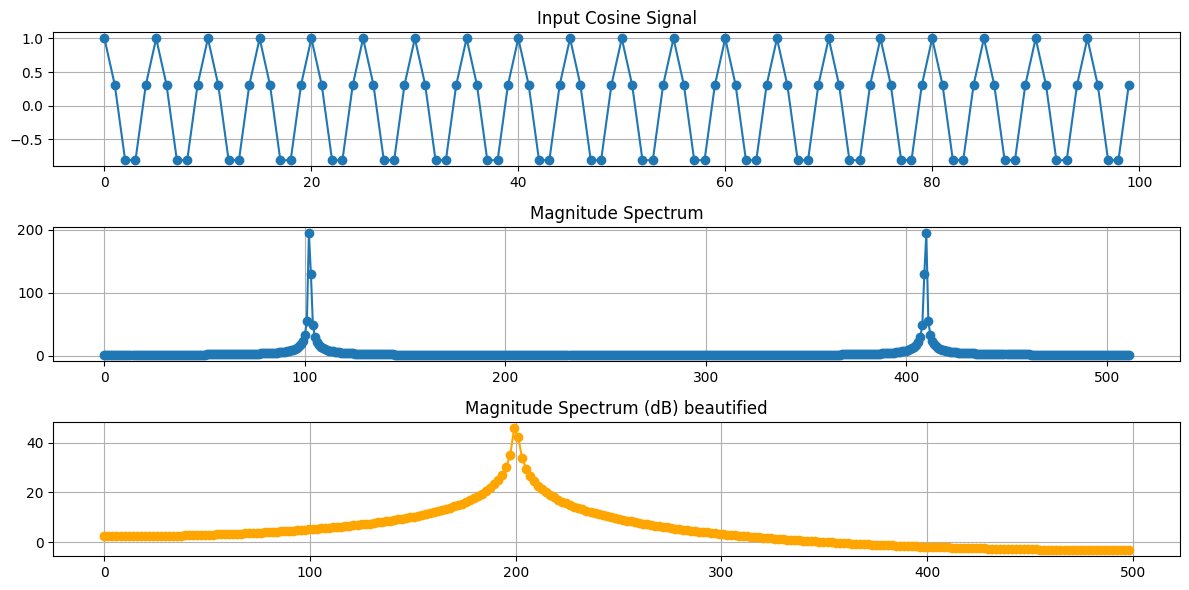

In [19]:
# E2 - 5.2: Plot input cosine signal suggested above, call gen_mag_spec(), and plot the output result. 
# Validate that the peak of the magnitude spectrum corrresponds to the frequency of the sinusoid.

test = np.array([10.0, 2.82842712, 2.0, 2.82842712])

mag_spec = gen_mag_spec(np.array([1, 2, 3, 4]))

if np.allclose(mag_spec, test):
    print("E2 - 5.2: correct")
else:
    print("E2 - 5.2: incorrect")    

fs = 1000
N = 512

x = np.cos(2 * np.pi * 200.0 * np.arange(N) / fs) # 200 Hz cosine sampled at 1000 Hz for 512 samples

# Resolution and frequency axis
delta_f = fs / N
freqs = np.arange(N) * delta_f # The axis goes from 0 to N-1, where Fk = k * delta_f

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(x[:100], marker='o')
plt.title("Input Cosine Signal")
plt.grid()  

mag_spec = gen_mag_spec(x)

plt.subplot(3, 1, 2)
plt.plot(mag_spec, marker='o')
plt.title("Magnitude Spectrum")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs[:len(freqs) // 2], 20 * np.log10(np.array(mag_spec[:len(mag_spec) // 2])), marker='o', color='orange')
plt.title("Magnitude Spectrum (dB) beautified")
plt.grid()

plt.tight_layout()
plt.show()

**Question E2 - 5.3:**

### Explain the plot shown, specially in terms of frequency and amplitude values, compared with the values of the sinusoid you started with.

To visually represent the magnitude of the spectrum, I chose two distinct plots. The first shows the raw result of applying the Discrete Fourier Transform (DFT) to the sinusoid and then extracting the absolute value (magnitude). The second plot presents a more refined visualization, which I consider the most accurate representation for this specific experiment. In discussing this exercise with classmates, some thought that the parameters were arbitrary and meant nothing, but others thought it was a clearly sinusoid. Therefore, the input signal is a 200 Hz sine wave sampled at a sampling frequency of 1000 Hz, consisting of 512 samples. Both spectral graphs display the DFT magnitude across the full frequency range, from 0 Hz up to the sampling frequency of 1000 Hz.

The first magnitude graph, or the "raw" spectrum, is dominated by two primary peaks corresponding to the signal's energy, located approximately between bins 102 and 103, with their symmetrical counterpart falling between bins 409 and 410. Crucially, the energy is not confined to a single bin but is distributed across adjacent bins. The intuitive expectation is to find a single, sharp peak at 200 Hz with an amplitude of N/2=256. However, neither of these conditions is met. This is due to the frequency resolution of the DFT, which is fs​/N=1000 Hz/512≈1.953 Hz. Since the signal frequency of 200 Hz is not an exact integer multiple of the resolution (1.953200​≈102.39), the energy is spread. This misalignment explains the peak's location between bins 102 and 103, rather than precisely at an integer bin.

Regarding the amplitude, the observed peak height is slightly less than 256. This reduction, known as scalloping loss, is a direct result of spectral leakage. Leakage occurs because the signal is observed over a finite duration (a rectangular window), and since the signal frequency doesn't perfectly align with a DFT bin center, the energy "leaks" from the main frequency into the adjacent intervals, preventing it from concentrating into a single sharp peak of maximum height.

To address the limitations of the raw graph, the second representation incorporates several key improvements. First, the magnitude is plotted on a logarithmic scale (decibels or dB). This is essential because it clearly visualizes the spectral leakage, allowing the low-level energy components (the side lobes, which are artifacts of the finite sampling window) to be easily distinguished from the background noise. Second, the inherent symmetry of the DFT for real-valued signals is removed by cutting the array in half, which holds the physically relevant information. Finally, the k indices (bins) are multiplied by the frequency resolution factor. This transforms the discrete bin axis into a continuous Hertz (Hz) axis, effectively placing the signal peak at the anticipated value of 200 Hz. In summary, the analysis successfully identifies the 200 Hz signal at the correct locations. However, the peak's exact shape and magnitude are subtly distorted due to the necessary frequency discretization imposed by the N=512 sample length analysis, resulting in spectral leakage and scalloping loss.
